<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/2_Modeling%26ForecastingTrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling and Forecasting Trends

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Linear trend
Data source ```laborforce.csv```

- ```LNS11300001``` is male labor force participation rate
- ```LNS11300002``` is female labor force participation rate


In [ ]:
labor = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/laborforce.csv', index_col = 'DATE', skipinitialspace=True)

## Male labor force participation rate

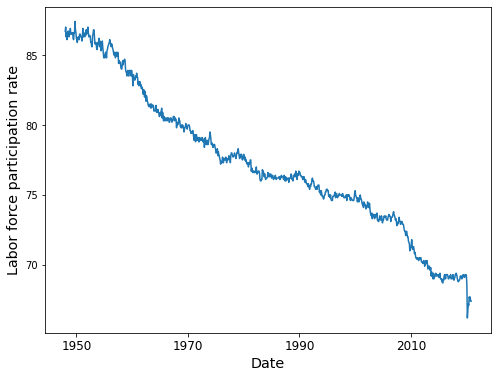

In [ ]:
# Plotting the time series

ydata = labor['LNS11300001']

fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(ydata, label='male');
ax.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large');
ax.set_ylabel('Labor force participation rate', fontsize='x-large');

In [ ]:
labor['constant'] = 1
labor['trend'] = np.arange(labor.shape[0])
X = ['constant', 'trend']
Y = ['LNS11300001']
result=sm.OLS(labor[Y],labor[X]).fit()
result.model.data.xnames=['C', 'trend']
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            LNS11300001   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.378e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:36:34   Log-Likelihood:                -1210.9
No. Observations:                 876   AIC:                             2426.
Df Residuals:                     874   BIC:                             2435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C             85.9651      0.065   1319.298      0.0

### Fitting a linear trend

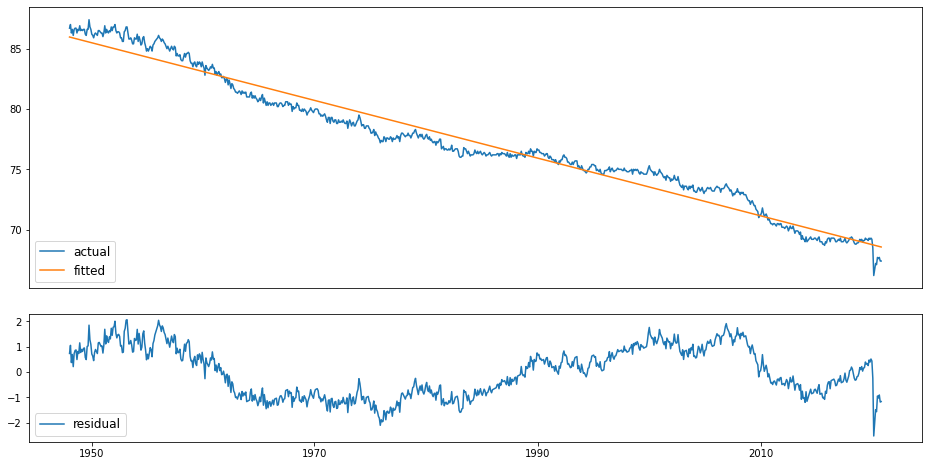

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

y_fit = result.fittedvalues
residual = ydata - y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='lower left', fontsize = 'large')
ax2.legend(loc='lower left', fontsize = 'large')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

plt.show()

## Female labor force participation rate

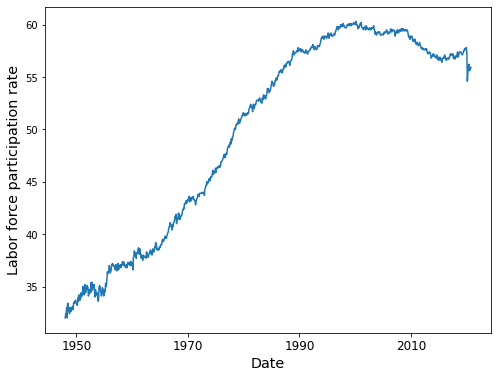

In [ ]:
ydata = labor['LNS11300002']

fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(ydata, label='female');
ax.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large');
ax.set_ylabel('Labor force participation rate', fontsize='x-large');

In [ ]:
trend = np.arange(len(labor['LNS11300002']))

Y = ['LNS11300002']
result=sm.OLS(labor[Y],labor[X]).fit()
result.model.data.xnames=['C', 'trend']
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            LNS11300002   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     5284.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:37:23   Log-Likelihood:                -2351.6
No. Observations:                 876   AIC:                             4707.
Df Residuals:                     874   BIC:                             4717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C             34.7213      0.240    144.908      0.0

### Fitting a linear trend

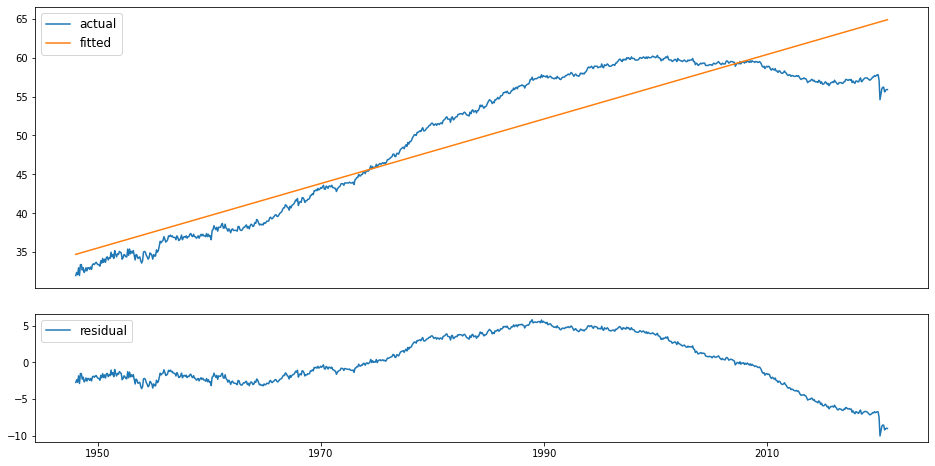

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

y_fit=result.fittedvalues
residual=ydata-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

plt.show()

# Quadratic trend
Data source ```trend.csv```

- ```NYSEVOL``` is volume on the New York Stock Exchange
- ```RTRR``` is retail sales (and will be used later)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/trend.csv', index_col='Date', skipinitialspace=True)
df = df["1945-01-01":]

In [ ]:
df['const'] = 1
df['trend'] = np.arange(df.shape[0])
df['trend2'] = df['trend']**2
df['logNYSEVOL'] = np.log(df['NYSEVOL'])
Y = ['NYSEVOL']
X = ['const', 'trend', 'trend2']

result=sm.OLS(df[Y],df[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                NYSEVOL   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1643.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          3.19e-269
Time:                        17:38:02   Log-Likelihood:                -6933.8
No. Observations:                 724   AIC:                         1.387e+04
Df Residuals:                     721   BIC:                         1.389e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4715.1132    389.036     12.120      0.0

### fitting a quadratic trend

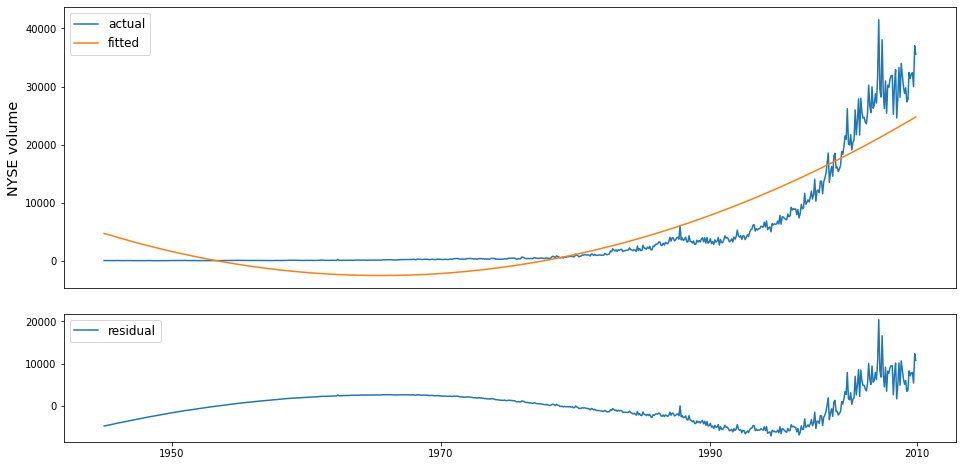

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit

ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('NYSE volume', fontsize = 'x-large')

plt.show()

#Exponential trend

In [ ]:
Y = ['logNYSEVOL']
X = ['const', 'trend']

result=sm.OLS(df[Y],df[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             logNYSEVOL   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.052e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:38:24   Log-Likelihood:                -254.43
No. Observations:                 724   AIC:                             512.9
Df Residuals:                     722   BIC:                             522.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4532      0.026     95.949      0.0

###Fitting a exponential trend

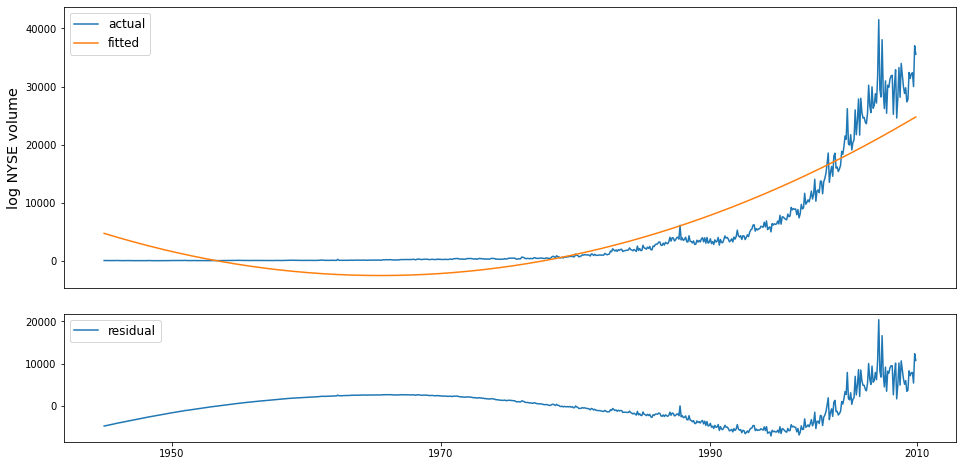

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit

ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-',label='residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('log NYSE volume', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

plt.show()

## Exercise: GDP - Quadratic trend

In [ ]:
gdp = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/GDP.csv', skipinitialspace=True, index_col='DATE')

Text(0, 0.5, 'GDP')

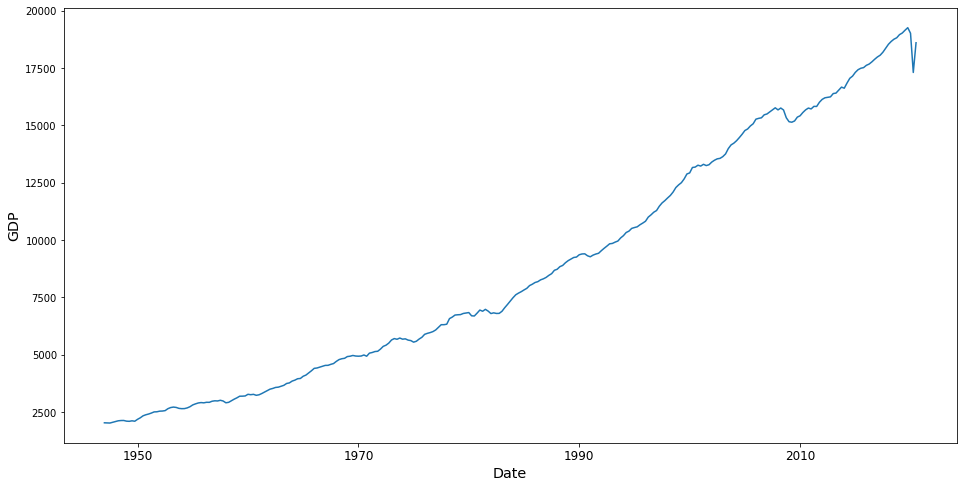

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.gca()
ax.plot(gdp)
ax.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax.set_xticklabels( ['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('GDP', fontsize = 'x-large')

In [ ]:
gdp['const'] = 1
gdp['trend'] = np.arange(gdp.shape[0])
gdp['trend2'] = gdp['trend']**2
Y = ['GDPC1']
X = ['const', 'trend', 'trend2']

result=sm.OLS(gdp[Y],gdp[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPC1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.033e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:39:05   Log-Likelihood:                -2155.7
No. Observations:                 295   AIC:                             4317.
Df Residuals:                     292   BIC:                             4329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1947.6962     62.933     30.949      0.0

### fitting a quadratic trend

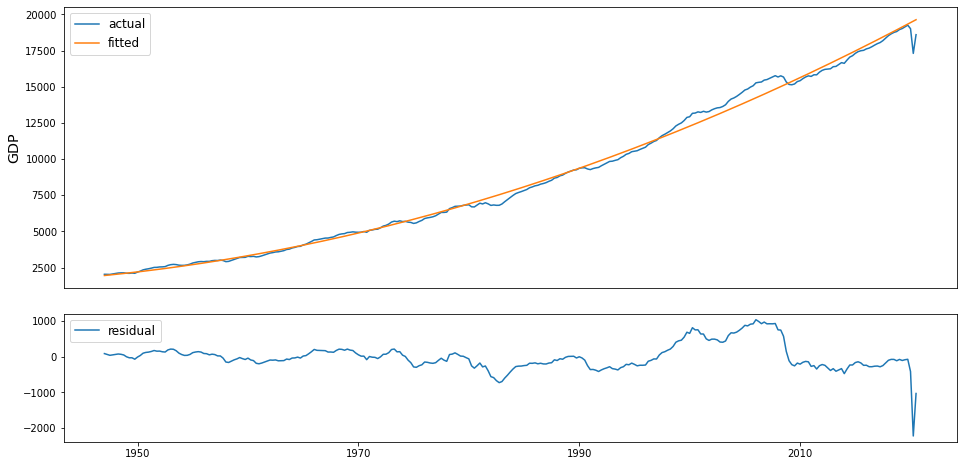

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = gdp[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-',label='residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('GDP', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

plt.show()

## Exercise: GDP - Exponential trend

In [ ]:
gdp['const'] = 1
gdp['trend'] = np.arange(len(gdp['GDPC1']))
gdp['trend2'] = gdp['trend']**2
gdp['logGDP'] = np.log(gdp['GDPC1'])
Y = ['logGDP']
X = ['const', 'trend']

result=sm.OLS(gdp[Y],gdp[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 logGDP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.573e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          1.68e-287
Time:                        18:09:15   Log-Likelihood:                 361.68
No. Observations:                 295   AIC:                            -719.4
Df Residuals:                     293   BIC:                            -712.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7281      0.008    933.840      0.0

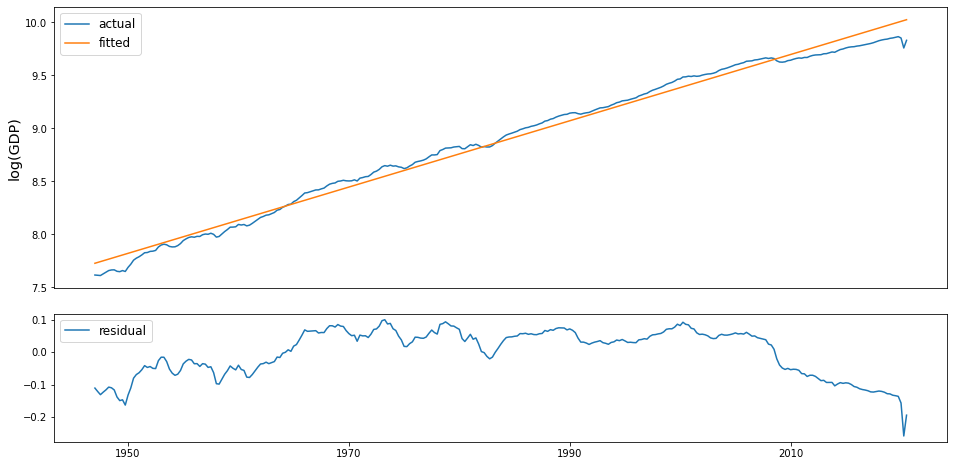

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = gdp[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit

ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('log(GDP)', fontsize='x-large')

plt.show()

# Applications - forecasting retail sales

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/trend.csv', index_col='Date', skipinitialspace=True)
df = data["1955-01-01":"1994-12-01"]

df['const'] = 1
df['trend'] = np.arange(df.shape[0]) +1
df['trend2'] = df['trend']**2
df['logRTRR'] = np.log(df['RTRR'])

###Linear trend

In [ ]:
Y = ['RTRR']
X = ['const', 'trend']

result=sm.OLS(df[Y][:-12],df[X][:-12], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RTRR   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4151.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          3.32e-234
Time:                        18:09:26   Log-Likelihood:                -5189.5
No. Observations:                 468   AIC:                         1.038e+04
Df Residuals:                     466   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.639e+04   1469.177    -11.157      0.0

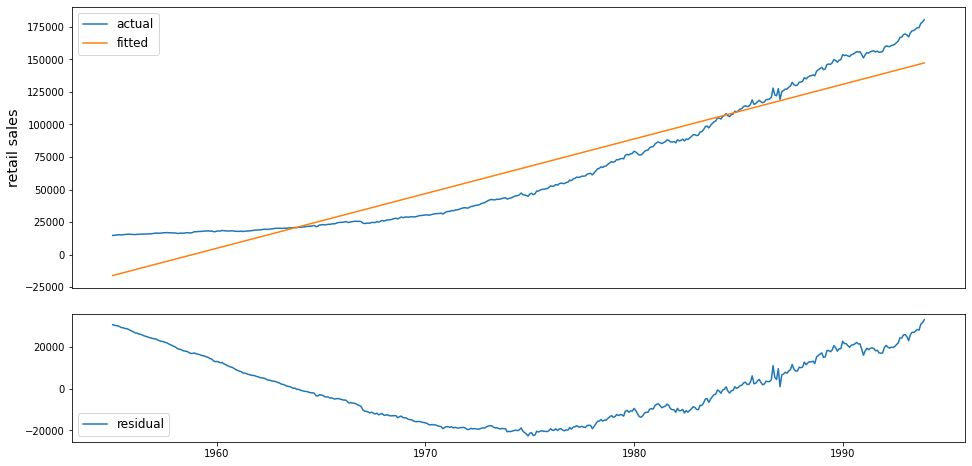

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y][:-12]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='lower left', fontsize = 'large')

ax1.set_xticks(['1960-01-01','1970-01-01', '1980-01-01', '1990-01-01'])
ax1.set_xticklabels(['1960', '1970', '1980', '1990'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('retail sales', fontsize='x-large')
plt.show()

###Forecasting using the linear trend model
12-month ahead path forecasts with confidence intervals

Text(0, 0.5, 'Retail sales')

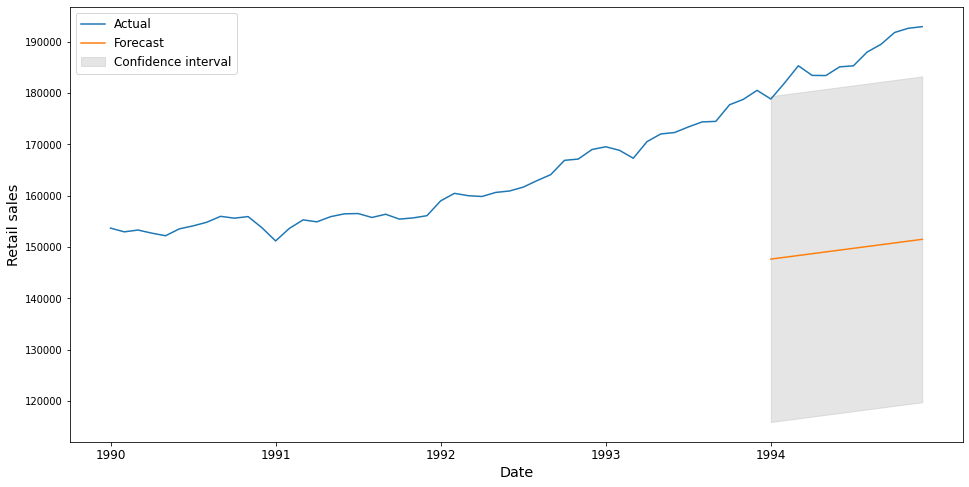

In [ ]:
se = np.sqrt(result.ssr/result.df_resid)
df['forecast1'] = result.params[0]+result.params[1]*df['trend']
df['forecast1_CI_l'] = result.params[0] + result.params[1]*df['trend'] - 2*se
df['forecast1_CI_u'] = result.params[0] + result.params[1]*df['trend'] + 2*se

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
ax.plot(df['RTRR'][-60:], label = 'Actual')
ax.plot(df['forecast1'][-12:], label = 'Forecast')
ax.fill_between(df.index[-12:], df['forecast1_CI_l'][-12:], df['forecast1_CI_u'][-12:], 
                color= 'gray', alpha = 0.2, zorder = 0, label = 'Confidence interval')
ax.set_xticks(['1990-01-01','1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01'])
ax.set_xticklabels(['1990', '1991', '1992', '1993', '1994'], fontsize='large')

ax.legend(fontsize='large')

ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Retail sales', fontsize='x-large')

###Quadratic trend

In [ ]:
Y = ['RTRR']
X = ['const', 'trend', 'trend2']

result=sm.OLS(df[Y][:-12],df[X][:-12], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RTRR   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 7.785e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:09:44   Log-Likelihood:                -4365.1
No. Observations:                 468   AIC:                             8736.
Df Residuals:                     465   BIC:                             8749.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.871e+04    379.957     49.239      0.0

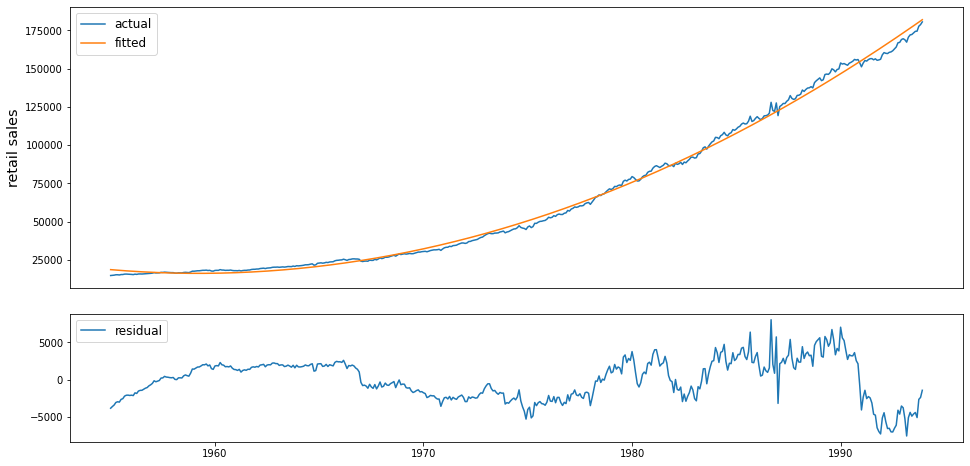

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y][:-12]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit

ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

ax1.set_xticks(['1960-01-01','1970-01-01', '1980-01-01', '1990-01-01'])
ax1.set_xticklabels(['1960', '1970', '1980', '1990'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('retail sales', fontsize='x-large')
plt.show()

###Forecasting using the quardratic trend model
12-month ahead path forecasts with confidence intervals

Text(0, 0.5, 'Retail sales')

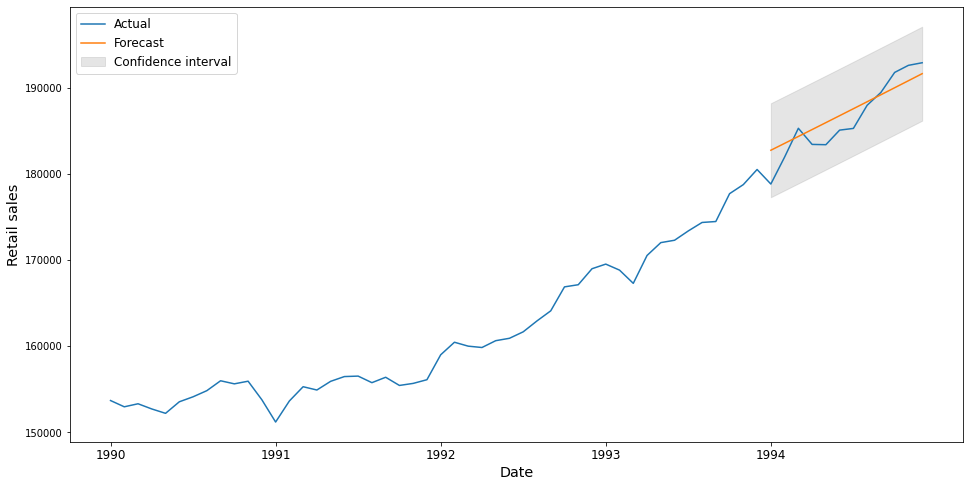

In [ ]:
se = np.sqrt(result.ssr/result.df_resid)
df['forecast2'] = result.params[0] + result.params[1]*df['trend'] + result.params[2]*df['trend']**2
df['forecast2_CI_l'] = result.params[0] + result.params[1]*df['trend'] + result.params[2]*df['trend']**2- 2*se
df['forecast2_CI_u'] = result.params[0] + result.params[1]*df['trend'] + result.params[2]*df['trend']**2+ 2*se

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
ax.plot(df['RTRR'][-60:], label = 'Actual')
ax.plot(df['forecast2'][-12:], label = 'Forecast')
ax.fill_between(df.index[-12:], df['forecast2_CI_l'][-12:], df['forecast2_CI_u'][-12:], 
                color= 'gray', alpha = 0.2, zorder = 0, label = 'Confidence interval')
ax.set_xticks(['1990-01-01','1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01'])
ax.set_xticklabels(['1990', '1991', '1992', '1993', '1994'], fontsize='large')

ax.legend(fontsize='large')

ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Retail sales', fontsize='x-large')

##Log-linear Trend

In [ ]:
Y = ['logRTRR']
X = ['const', 'trend']

result=sm.OLS(df[Y][:-12],df[X][:-12], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                logRTRR   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.559e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:10:11   Log-Likelihood:                 454.19
No. Observations:                 468   AIC:                            -904.4
Df Residuals:                     466   BIC:                            -896.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3900      0.009   1103.684      0.0

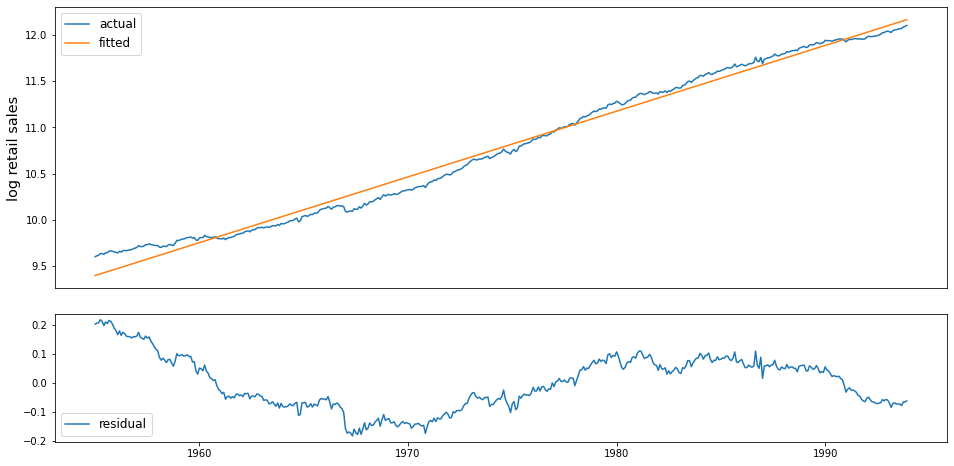

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y][:-12]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='lower left', fontsize = 'large')

ax1.set_xticks(['1960-01-01','1970-01-01', '1980-01-01', '1990-01-01'])
ax1.set_xticklabels(['1960', '1970', '1980', '1990'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('log retail sales', fontsize='x-large')

plt.show()

## Exponential trend
Estimation of a non-linear model using least-squares

In [ ]:
pip install lmfit

In [ ]:
def exponential(x, c1, c2):
    return c1 * np.exp(c2 * x)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 468
    # variables        = 2
    chi-square         = 1.2448e+10
    reduced chi-square = 26712044.9
    Akaike info crit   = 8005.08828
    Bayesian info crit = 8013.38522
[[Variables]]
    c1:  12769.0421 +/- 180.714899 (1.42%) (init = 5000)
    c2:  0.00578296 +/- 3.6057e-05 (0.62%) (init = 0.005)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.979


Text(0, 0.5, 'retail sales')

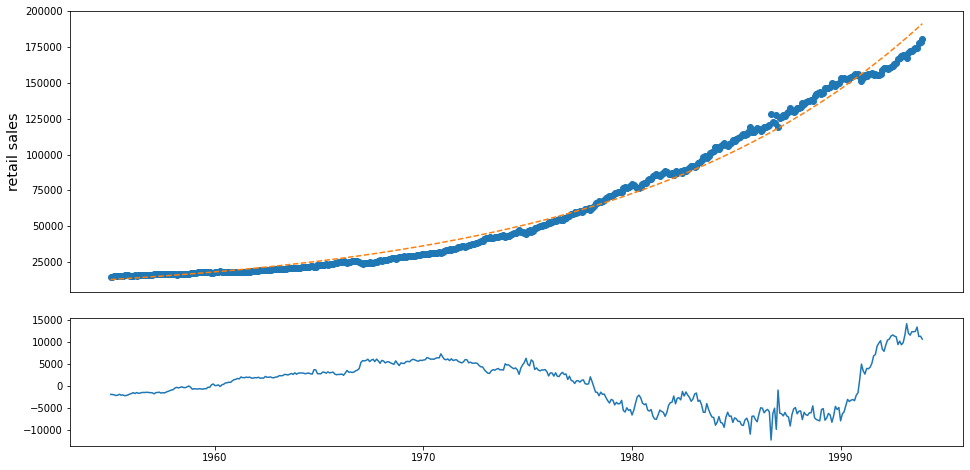

In [ ]:
from lmfit import Model
gmodel = Model(exponential)
params = gmodel.make_params(c1 = 5000, c2 = 0.005)
result = gmodel.fit(df['RTRR'][:-12], params, x=df['trend'][:-12], nan_policy='omit')
print(result.fit_report())

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ax1.plot(df['RTRR'][:-12], 'o')
ax1.plot(result.best_fit, '--', label='best fit')
ax1.set_xticks(['1960-01-01','1970-01-01', '1980-01-01', '1990-01-01'])
ax1.set_xticklabels(['1960', '1970', '1980', '1990'], fontsize='large')
# plt.plot(x, result.best_fit, 'r-', label='best fit')

ax2.plot(result.residual,'-',label='Residual')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('retail sales', fontsize='x-large')

###Forecasting using the exponential trend model
12-month ahead path forecasts with confidence intervals

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

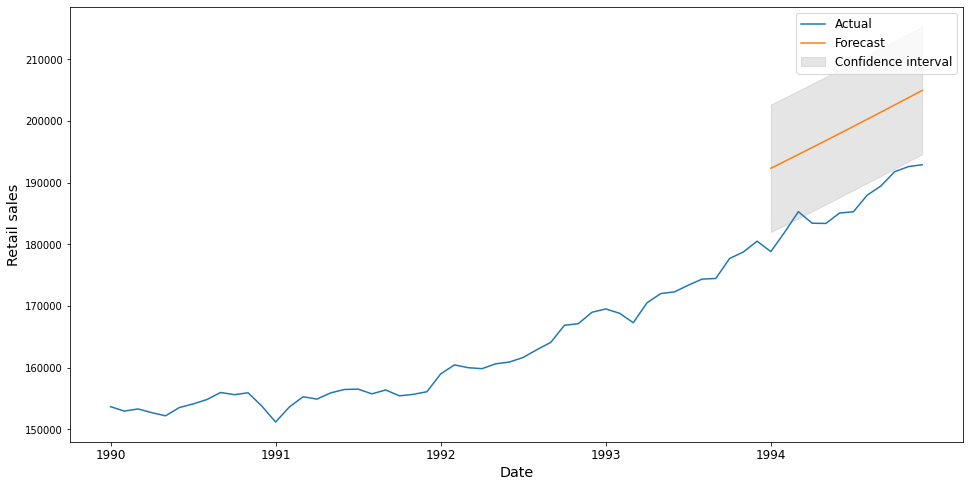

In [89]:
se = np.sqrt(np.sum(result.residual**2)/(468-2))
df['forecast3'] = result.values['c1'] * np.exp(result.values['c2']*df['trend'])
df['forecast3_CI_l'] = result.values['c1'] * np.exp(result.values['c2']*df['trend']) - 2*se
df['forecast3_CI_u'] = result.values['c1'] * np.exp(result.values['c2']*df['trend']) + 2*se

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
ax.plot(df['RTRR'][-60:], label = 'Actual')
ax.plot(df['forecast3'][-12:], label = 'Forecast')
ax.fill_between(df.index[-12:], df['forecast3_CI_l'][-12:], df['forecast3_CI_u'][-12:], 
                color= 'gray', alpha = 0.2, zorder = 0, label = 'Confidence interval')
ax.set_xticks(['1990-01-01','1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01'])
ax.set_xticklabels(['1990', '1991', '1992', '1993', '1994'], fontsize='large')

ax.legend(fontsize='large')

ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Retail sales', fontsize='x-large')

plt.show()